In [54]:
from deterministic_matrices import generate_Wigner
import pandas as pd
import numpy as np
from numpy.linalg import eigh, inv, eigvals, eigh, eig, norm
import matplotlib.pyplot as plt
import scipy


In [34]:
N = 100
sigma = 1
W = generate_Wigner(N=N, sigma=sigma)

In [35]:
eig_vals, eig_vecs = eig(W)

In [36]:
def stieltjes_transform(z):
    return (1/N) * sum(1/(z-eig_vals))

In [37]:
def estimated_density(x, eta):
    return (stieltjes_transform(x - eta*1j)/np.pi).imag

C:\Users\Adria\AppData\Local\Temp\ipykernel_97888\3664000950.py:5: RuntimeWarning: invalid value encountered in sqrt
  wigner_densities = [np.sqrt(4*sigma**2 - x**2)/(2*np.pi*sigma**2) for x in xs]
C:\Users\Adria\AppData\Local\Temp\ipykernel_97888\3664000950.py:12: RuntimeWarning: invalid value encountered in sqrt
  wigner_densities = [np.sqrt(4*sigma**2 - x**2)/(2*np.pi*sigma**2) for x in xs]


Text(0.5, 1.0, 'KDE on Eigenvalues')

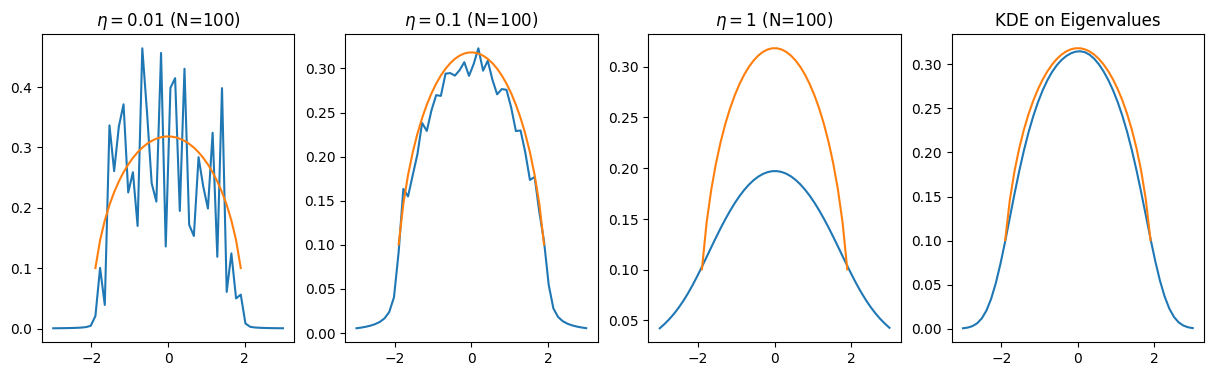

In [62]:
fig, axes = plt.subplots(ncols=3+1, figsize=(15,4))
for ax_idx, eta in enumerate([1/N, 1/np.sqrt(N), 1]):
    xs = np.linspace(-3, 3, 50)
    gs = [estimated_density(x, eta) for x in xs]
    wigner_densities = [np.sqrt(4*sigma**2 - x**2)/(2*np.pi*sigma**2) for x in xs]
    _ = axes[ax_idx].plot(xs, gs)
    _ = axes[ax_idx].plot(xs, wigner_densities)
    _ = axes[ax_idx].set_title(f"$\eta={eta}$ (N={N})")

kernel = scipy.stats.gaussian_kde(eig_vals)
xs = np.linspace(-3, 3, 50)
wigner_densities = [np.sqrt(4*sigma**2 - x**2)/(2*np.pi*sigma**2) for x in xs]
Z = np.reshape(kernel(xs).T, xs.shape)
_ = axes[3].plot(xs, Z)
_ = axes[3].plot(xs, wigner_densities)
_ = axes[3].set_title("KDE on Eigenvalues")

Interesting:
===========
The density estimator based on the Stieltjes transform is based on the convolution of the (empirical) density and a Cauchy kernel.

Hence it makes sense that the KDE on the Eigenvalues themselfes yields a similar result.

However, its nice that we can use the Stieltjes transform approach to get the density of Ensembles in an analytical form without needing to resort to (MC-) simulations.

Text(0.5, 0, '$\\eta$')

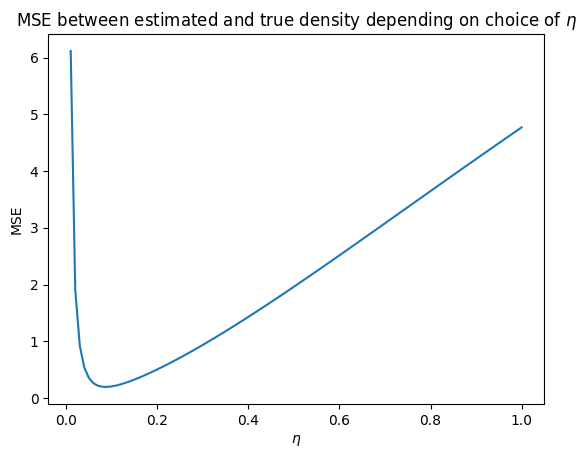

In [51]:
etas = np.linspace(1/N, 1, 100)
errors = []
for eta in etas:
    xs = np.linspace(-3, 3, int(6/0.01))
    gs = [estimated_density(x, eta) for x in xs]
    wigner_densities = [np.sqrt(4*sigma**2 - x**2)/(2*np.pi*sigma**2) if np.abs(x) < 2 else 0 for x in xs]
    error = sum([(a - b)**2 for a, b in zip(gs, wigner_densities)])
    errors.append(error)
    
plt.plot(etas, errors)
plt.title("MSE between estimated and true density depending on choice of $\eta$")
plt.ylabel("MSE")
plt.xlabel("$\eta$")